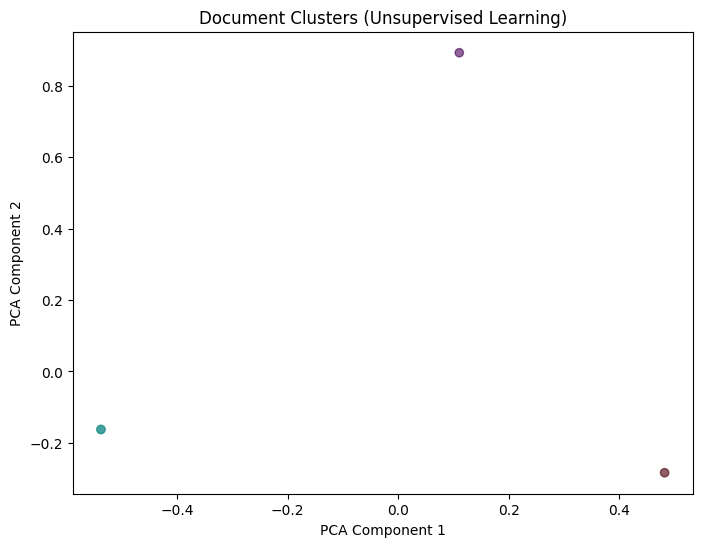


Cluster 0 Examples:
- 2. "Coffee Shop Receipt\nTotal: $12.75\nPayment Me...
- 5. "Service Agreement\nClient: XYZ Corp\nTerm: 6 m...

Cluster 1 Examples:
- 3. "Subject: Project Update\nHi Team, please revie...
- 4. "Q4 Financial Report\nRevenue: $2.5M\nExpenses:...

Cluster 2 Examples:
- 1. "Invoice #INV-2023-005\nDate: 2023-11-10\nTotal...


In [11]:
# Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data from .txt file (one document per line)
with open("receipts.txt", "r") as f:
    documents = [line.strip() for line in f.readlines()]

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)

# Cluster into groups (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Reduce dimensions for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("Document Clusters (Unsupervised Learning)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Print sample documents from each cluster
for cluster_id in range(3):
    print(f"\nCluster {cluster_id} Examples:")
    cluster_docs = [doc for doc, c in zip(documents, clusters) if c == cluster_id]
    for doc in cluster_docs[:2]:  # Print first 2 docs per cluster
        print(f"- {doc[:50]}...")  # Truncate for readability